<a href="https://colab.research.google.com/github/Felipe-Pinto/python_para_investimentos/blob/master/Previs%C3%A3o_pre%C3%A7o_PRIO3_Previsao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importando as bibliotecas
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#formatando valores com duas casas decimais
pd.options.display.float_format = '{:.2f}'.format

In [3]:
#lendo o arquivo de ações
#Lendo csv

Cotacoes = yf.Ticker("PRIO3.SA")

# Opções de períodos 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y e ytd.
dados = Cotacoes.history(period="5y")
dados.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-11-08 00:00:00-03:00,3.91,3.95,3.85,3.95,5726500,0.00,0.00
2019-11-11 00:00:00-03:00,3.94,3.98,3.88,3.90,4601000,0.00,0.00
2019-11-12 00:00:00-03:00,3.91,3.95,3.83,3.87,5224500,0.00,0.00
2019-11-13 00:00:00-03:00,3.86,3.91,3.80,3.85,4269000,0.00,0.00
2019-11-14 00:00:00-03:00,3.85,3.94,3.85,3.89,4367500,0.00,0.00


In [4]:
# Retira o indice do campo data

dados.reset_index(inplace=True)
dados.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-11-08 00:00:00-03:00,3.91,3.95,3.85,3.95,5726500,0.00,0.00
1,2019-11-11 00:00:00-03:00,3.94,3.98,3.88,3.90,4601000,0.00,0.00
2,2019-11-12 00:00:00-03:00,3.91,3.95,3.83,3.87,5224500,0.00,0.00
3,2019-11-13 00:00:00-03:00,3.86,3.91,3.80,3.85,4269000,0.00,0.00
4,2019-11-14 00:00:00-03:00,3.85,3.94,3.85,3.89,4367500,0.00,0.00


In [5]:
dados.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
1240,2024-11-04 00:00:00-03:00,40.35,41.34,40.33,40.88,8831200,0.00,0.00
1241,2024-11-05 00:00:00-03:00,40.90,41.07,39.96,40.33,6951400,0.00,0.00
1242,2024-11-06 00:00:00-03:00,39.00,41.05,38.85,40.89,10767300,0.00,0.00
1243,2024-11-07 00:00:00-03:00,40.61,40.80,39.73,39.91,6830300,0.00,0.00
1244,2024-11-08 00:00:00-03:00,39.64,39.94,38.82,38.93,5594300,0.00,0.00


In [6]:
#dados.drop(dados.tail(1).index,inplace=True)
#dados.tail()

In [7]:
#dados.tail()

In [8]:
# Vamos escluir as colunas que não serão utilizadas e renomear os campos

dados.drop('Dividends', axis=1, inplace=True)
dados.drop('Stock Splits', axis=1, inplace=True)
dados.columns = ['Data', 'Abertura', 'Maximo', 'Minimo', 'Fechamento', 'Volume']
dados.head()

,Data,Abertura,Maximo,Minimo,Fechamento,Volume
0,2019-11-08 00:00:00-03:00,3.91,3.95,3.85,3.95,5726500
1,2019-11-11 00:00:00-03:00,3.94,3.98,3.88,3.90,4601000
2,2019-11-12 00:00:00-03:00,3.91,3.95,3.83,3.87,5224500
3,2019-11-13 00:00:00-03:00,3.86,3.91,3.80,3.85,4269000
4,2019-11-14 00:00:00-03:00,3.85,3.94,3.85,3.89,4367500


In [9]:
dados.tail()

,Data,Abertura,Maximo,Minimo,Fechamento,Volume
1240,2024-11-04 00:00:00-03:00,40.35,41.34,40.33,40.88,8831200
1241,2024-11-05 00:00:00-03:00,40.90,41.07,39.96,40.33,6951400
1242,2024-11-06 00:00:00-03:00,39.00,41.05,38.85,40.89,10767300
1243,2024-11-07 00:00:00-03:00,40.61,40.80,39.73,39.91,6830300
1244,2024-11-08 00:00:00-03:00,39.64,39.94,38.82,38.93,5594300


In [10]:
# Vamos observar o nosso range de dados

print('Menor data: ', dados['Data'].min())
print('Maior data: ', dados['Data'].max())

Menor data:  2019-11-08 00:00:00-03:00
Maior data:  2024-11-08 00:00:00-03:00


In [11]:
# Vamos observar os dados refernte a última data do nosso conjunto de dados

display(dados.loc[dados['Data'] == dados['Data'].max()])

,Data,Abertura,Maximo,Minimo,Fechamento,Volume
1244,2024-11-08 00:00:00-03:00,39.64,39.94,38.82,38.93,5594300


In [12]:
# Tipo de dados

dados.dtypes

,0
Data,"datetime64[ns, America/Sao_Paulo]"
Abertura,float64
Maximo,float64
Minimo,float64
Fechamento,float64
Volume,int64


In [13]:
# Volume de dados

dados.shape

(1245, 6)

In [14]:
# Sumário estatístico

dados.describe()

,Abertura,Maximo,Minimo,Fechamento,Volume
count,1245.00,1245.00,1245.00,1245.00,1245.00
mean,27.07,27.56,26.55,27.04,16437596.55
std,14.61,14.75,14.44,14.59,10899139.48
min,2.08,2.46,1.82,2.07,0.00
25%,16.62,17.22,16.19,16.72,9324500.00
50%,25.44,26.15,24.80,25.55,13677700.00
75%,41.89,42.56,41.36,41.92,20912500.00
max,51.61,52.13,50.44,50.86,161938000.00


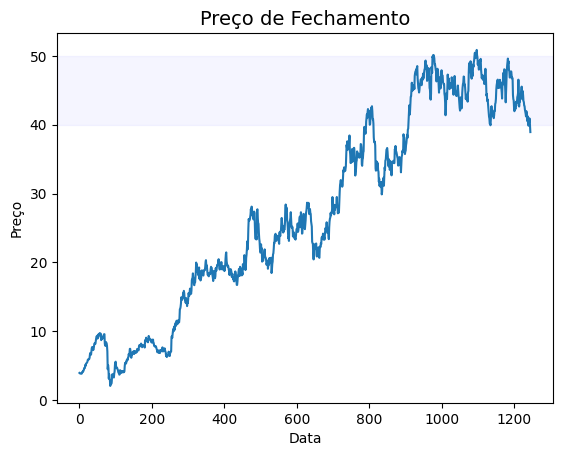

In [15]:
# Plot
plt.plot(dados['Fechamento'])
plt.title('Preço de Fechamento', size=14)

# Get the current axes object and then call axhspan
plt.gca().axhspan(ymin=40, ymax=50, alpha=0.04, color='blue')
# ymin and ymax specify the vertical extent, alpha controls transparency

plt.xlabel('Data')
plt.ylabel('Preço')
plt.show()

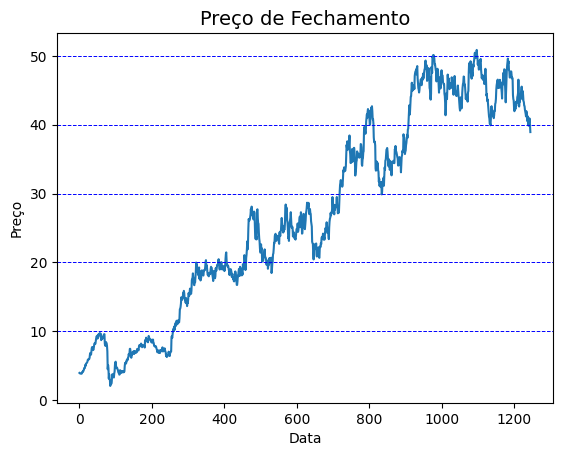

In [16]:
# prompt: plotar o gráfico acima com linhas hotizontais

# ... (Your existing code)

# Plot
plt.plot(dados['Fechamento'])
plt.title('Preço de Fechamento', size=14)

# Add horizontal lines at specific prices
horizontal_lines = [10, 20, 30, 40, 50] # Example prices
for price in horizontal_lines:
    plt.axhline(y=price, color='b', linestyle='--', linewidth=0.7)


plt.xlabel('Data')
plt.ylabel('Preço')
plt.show()

In [17]:
# Criando novos campos de média móvel com 5 dias, 14 dias e 21 dias

dados['mm5d'] = dados['Fechamento'].rolling(5).mean()
dados['mm14d'] = dados['Fechamento'].rolling(14).mean()
dados['mm21d'] = dados['Fechamento'].rolling(21).mean()

In [18]:
dados.head(30)

,Data,Abertura,Maximo,Minimo,Fechamento,Volume,mm5d,mm14d,mm21d
0,2019-11-08 00:00:00-03:00,3.91,3.95,3.85,3.95,5726500,NaN,NaN,NaN
1,2019-11-11 00:00:00-03:00,3.94,3.98,3.88,3.90,4601000,NaN,NaN,NaN
2,2019-11-12 00:00:00-03:00,3.91,3.95,3.83,3.87,5224500,NaN,NaN,NaN
3,2019-11-13 00:00:00-03:00,3.86,3.91,3.80,3.85,4269000,NaN,NaN,NaN
4,2019-11-14 00:00:00-03:00,3.85,3.94,3.85,3.89,4367500,3.89,NaN,NaN
5,2019-11-18 00:00:00-03:00,3.91,3.99,3.81,3.87,6628500,3.87,NaN,NaN
6,2019-11-19 00:00:00-03:00,3.86,3.89,3.82,3.84,4888500,3.86,NaN,NaN
7,2019-11-21 00:00:00-03:00,3.85,3.95,3.81,3.94,5734000,3.88,NaN,NaN
8,2019-11-22 00:00:00-03:00,3.93,4.13,3.92,4.12,9723000,3.93,NaN,NaN
9,2019-11-25 00:00:00-03:00,4.11,4.19,4.07,4.07,5291500,3.97,NaN,NaN


In [19]:
dados.dropna(inplace=True)

In [20]:
dados.shape

(1225, 9)

In [21]:
#verificando quantidade de linhas
qtd_linhas = len(dados)
qtd_linhas_treino=qtd_linhas -400
qtd_linhas_teste = qtd_linhas -20

qtd_linhas_validacao = qtd_linhas_treino - qtd_linhas_teste

info = (
    f"linhas treino= 0:{qtd_linhas_treino}"
    f" linhas teste= {qtd_linhas_treino}:{qtd_linhas_teste}"
    f" linhas validação= {qtd_linhas_teste}:{qtd_linhas}"
)

info


'linhas treino= 0:825 linhas teste= 825:1205 linhas validação= 1205:1225'

In [22]:
# Separando variáveis preditoras das variáveis alvo

preditoras = dados.drop(['Data','Fechamento','Volume'], axis=1)
target = dados['Fechamento']

In [23]:
preditoras.head()

,Abertura,Maximo,Minimo,mm5d,mm14d,mm21d
20,5.37,5.42,5.27,5.22,4.65,4.39
21,5.39,5.67,5.36,5.30,4.76,4.46
22,5.47,5.65,5.47,5.42,4.86,4.55
23,5.69,5.96,5.62,5.53,4.99,4.64
24,5.99,6.18,5.88,5.64,5.11,4.74


In [24]:
# Normalizando os dados de entrada(features)

# Gerando o novo padrão
scaler = MinMaxScaler().fit(preditoras)
preditoras_normalizadas = scaler.transform(preditoras)

In [25]:
# Verificando a normalização realizada
print ('preditoras: ',preditoras_normalizadas.shape)
print (preditoras_normalizadas)

preditoras:  (1225, 6)
[[0.06651497 0.05942219 0.07108682 0.0595854  0.03475709 0.01985857]
 [0.06691809 0.06448795 0.07285269 0.06118181 0.03709419 0.02143104]
 [0.06853057 0.0640859  0.07515244 0.06373105 0.0393488  0.02318144]
 ...
 [0.74542396 0.77690954 0.76163503 0.79966774 0.81663323 0.83730973]
 [0.77792733 0.77187591 0.77973351 0.79518893 0.8131602  0.83338262]
 [0.75834454 0.75456021 0.76101806 0.79133801 0.80858559 0.82721736]]


In [26]:
#Separa os dados de treino, teste e validação
X_train = preditoras_normalizadas[:qtd_linhas_treino]
X_test = preditoras_normalizadas[qtd_linhas_treino:qtd_linhas_teste]

y_train = target[:qtd_linhas_treino]
y_test = target[qtd_linhas_treino:qtd_linhas_teste]

print( len(X_train), len(y_train))

print( len(X_test), len(y_test))

825 825
380 380


In [27]:
#treinamento usando regressão linear
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
predicao = lr.predict(X_test)
cd = r2_score(y_test, predicao)

f'Coeficiente de determinação:{cd * 100:.2f}'

'Coeficiente de determinação:99.44'

In [28]:
#rede neural
rn = MLPRegressor(max_iter=2000)
rn.fit(X_train, y_train)
pred= rn.predict(X_test)

cd = rn.score(X_test, y_test)

f'Coeficiente de determinação:{cd * 100:.2f}'

'Coeficiente de determinação:98.21'

In [29]:
#executando a previsão

previsao=preditoras_normalizadas[qtd_linhas_teste:qtd_linhas]

data_pregao_full=dados['Data']
data_pregao=data_pregao_full[qtd_linhas_teste:qtd_linhas]

res_full= dados['Fechamento']
res = res_full[qtd_linhas_teste:qtd_linhas]

pred = lr.predict(previsao)

df = pd.DataFrame({'Data_Pregao':data_pregao, 'Real':res, 'Previsao':pred})
df['Real'] = df['Real'].shift(+1)

df.set_index('Data_Pregao', inplace=True)

print(df)


                           Real  Previsao
Data_Pregao                              
2024-10-14 00:00:00-03:00   NaN     43.97
2024-10-15 00:00:00-03:00 43.43     43.17
2024-10-16 00:00:00-03:00 43.30     42.91
2024-10-17 00:00:00-03:00 42.77     42.60
2024-10-18 00:00:00-03:00 42.70     42.46
2024-10-21 00:00:00-03:00 42.18     41.90
2024-10-22 00:00:00-03:00 41.92     41.81
2024-10-23 00:00:00-03:00 41.61     41.33
2024-10-24 00:00:00-03:00 41.20     41.67
2024-10-25 00:00:00-03:00 41.96     41.71
2024-10-28 00:00:00-03:00 41.65     40.86
2024-10-29 00:00:00-03:00 40.95     40.34
2024-10-30 00:00:00-03:00 40.50     41.39
2024-10-31 00:00:00-03:00 41.21     40.95
2024-11-01 00:00:00-03:00 40.98     40.08
2024-11-04 00:00:00-03:00 39.85     41.11
2024-11-05 00:00:00-03:00 40.88     40.30
2024-11-06 00:00:00-03:00 40.33     40.53
2024-11-07 00:00:00-03:00 40.89     40.08
2024-11-08 00:00:00-03:00 39.91     39.29


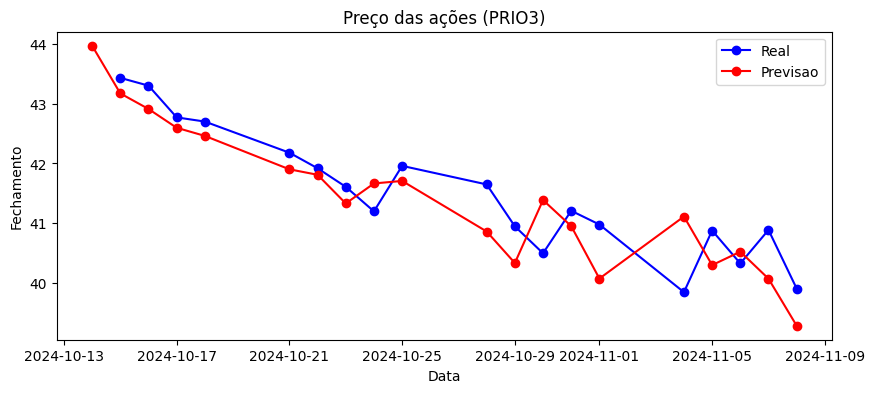

In [30]:
#Gerando o Grafico
plt.figure(figsize=(10,4))
plt.title('Preço das ações (PRIO3)')
plt.plot(df['Real'],label="Real",color='blue', marker='o')
plt.plot(df['Previsao'],label="Previsao",color='red', marker='o')
plt.xlabel('Data')
plt.ylabel('Fechamento')
leg = plt.legend()

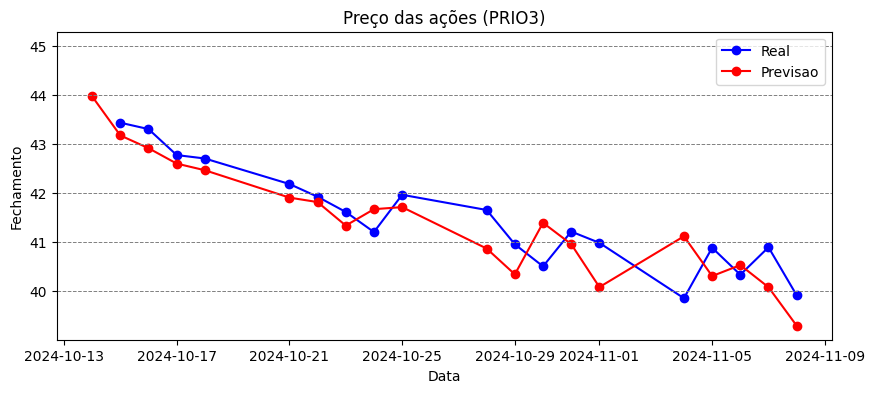

In [31]:
# prompt: usando comando do matplotlib acrescentar linhas horizontais

# ... (Your existing code)

# Plot
plt.figure(figsize=(10, 4))  # Adjust figure size if needed
plt.plot(df['Real'], label="Real", color='blue', marker='o')
plt.plot(df['Previsao'], label="Previsao", color='red', marker='o')
plt.title('Preço das ações (PRIO3)')
plt.xlabel('Data')
plt.ylabel('Fechamento')

# Add horizontal lines at specific prices
horizontal_lines = [40, 41, 42, 43, 44, 45]  # Example prices.  Adjust these to the values you need
for price in horizontal_lines:
    plt.axhline(y=price, color='gray', linestyle='--', linewidth=0.7)

leg = plt.legend()
plt.show()